# Learn with Linear Model

Use a linear model to learn weights for draco. 

In [25]:
from draco.learn import linear
from draco.learn import data_util
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
data, _ = data_util.load_data(test_size=0.3)
data = data[data.source == 'younghoon']

In [3]:
# limit task
# data.task.hist()
# data= data[data.task == 'derived']

In [4]:
X = data.negative - data.positive
y = np.ones(len(X))

## Run Model and then PCA

We see 7 distinct clusters. What do they mean?

Train score:  0.9357231149567367


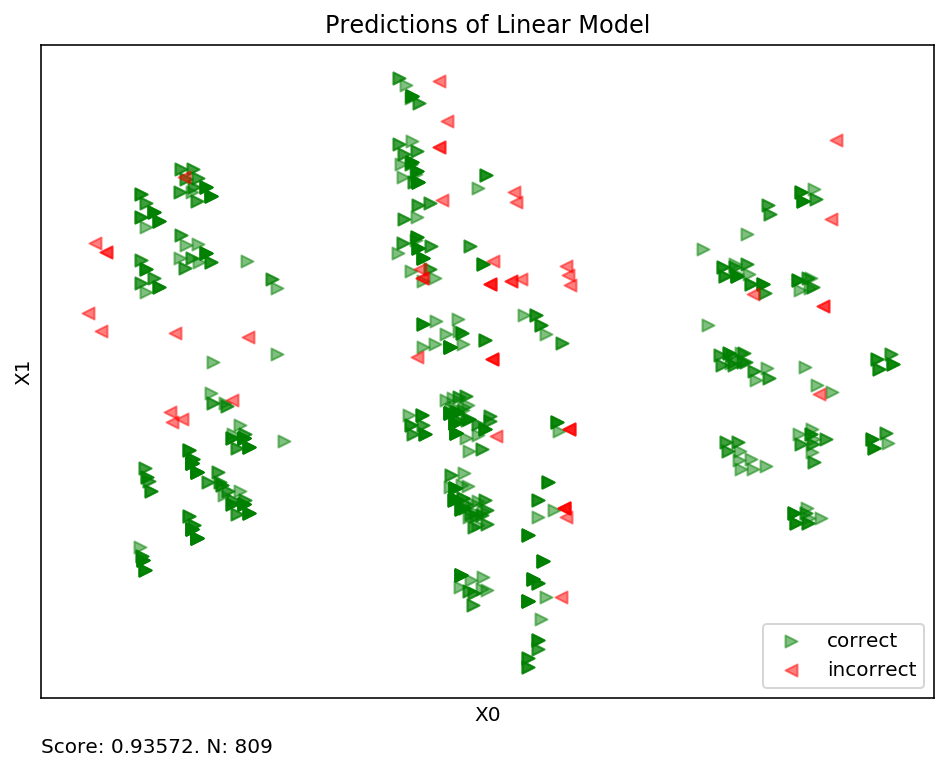

CPU times: user 798 ms, sys: 78.4 ms, total: 877 ms
Wall time: 1.1 s


LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=False,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [5]:
%time linear.train_and_plot(data, test_size=0)

## Try a different models

Trying out models that are not just linear models just to see how well we do. 

In [6]:
print("Our approach")
linear.train_model(X, test_size=0.3)
print()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

X_pair = np.concatenate((X, -X), axis=0)
y_pair = np.concatenate((y, -y), axis=0)
X_pair_train = np.concatenate((X_train, -X_train), axis=0)
y_pair_train = np.concatenate((y_train, -y_train), axis=0)

linear_svc = LinearSVC()
linear_svc.fit(X_pair_train, y_pair_train)
scores = cross_val_score(linear_svc, X_pair, y_pair, cv=KFold(n_splits=5), n_jobs=-1)

print("Linear SVC")
print("Train score: ", linear_svc.score(X_pair_train,y_pair_train))
print("Dev score: ", linear_svc.score(X_test,y_test))
print("Accuracy: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std() * 2))
print()

tree = DecisionTreeClassifier()
tree.fit(X_pair_train, y_pair_train)
scores = cross_val_score(tree, X_pair, y_pair, cv=KFold(n_splits=5), n_jobs=-1)

print("Decision tree")
print("Train score: ", tree.score(X_pair_train,y_pair_train))
print("Dev score: ", tree.score(X_test,y_test))
print("Accuracy: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std() * 2))
print()


svm = SVC()
svm.fit(X_pair_train, y_pair_train)
scores = cross_val_score(svm, X_pair, y_pair, cv=KFold(n_splits=5), n_jobs=-1)

print("Kernel SVM")
print("Train score: ", svm.score(X_pair_train,y_pair_train))
print("Dev score: ", svm.score(X_test,y_test))
print("Accuracy: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std() * 2))
print()

nn = MLPClassifier()
nn.fit(X_pair_train, y_pair_train)
scores = cross_val_score(nn, X_pair, y_pair, cv=KFold(n_splits=5), n_jobs=-1)

print("Multi-Layer Perceptron")
print("Train score: ", nn.score(X_pair_train,y_pair_train))
print("Dev score: ", nn.score(X_test,y_test))
print("Accuracy: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std() * 2))
print()

Our approach
Train score:  0.9363957597173145
Dev score:  0.9382716049382716

Linear SVC
Train score:  0.9434628975265018
Dev score:  0.9135802469135802
Accuracy: 0.920 (+/- 0.014)

Decision tree
Train score:  0.9628975265017667
Dev score:  0.897119341563786
Accuracy: 0.896 (+/- 0.039)

Kernel SVM
Train score:  0.9275618374558304
Dev score:  0.9259259259259259
Accuracy: 0.873 (+/- 0.047)

Multi-Layer Perceptron
Train score:  0.9602473498233216
Dev score:  0.9300411522633745
Accuracy: 0.914 (+/- 0.026)



From the looks of it, a non linear approach does not work better. Thus, we conclude:

1. We can’t put a non-linear back into the constraint system so that's no good.
2. Even if we could, it would be hard to understand the model.
3. And it also performs worse.

# Find good C

In [7]:
for c in range(1,20,1):
    C = 1.0*c/10
    print(C)
    linear.train_model(X, test_size=0.3, C=C)
    print()

0.1
Train score:  0.9399293286219081
Dev score:  0.9382716049382716

0.2
Train score:  0.9363957597173145
Dev score:  0.9382716049382716

0.3
Train score:  0.9363957597173145
Dev score:  0.9382716049382716

0.4
Train score:  0.9363957597173145
Dev score:  0.9382716049382716

0.5
Train score:  0.9363957597173145
Dev score:  0.9382716049382716

0.6
Train score:  0.9363957597173145
Dev score:  0.9382716049382716

0.7
Train score:  0.9363957597173145
Dev score:  0.9382716049382716

0.8
Train score:  0.9363957597173145
Dev score:  0.9382716049382716

0.9
Train score:  0.9363957597173145
Dev score:  0.9382716049382716

1.0
Train score:  0.9363957597173145
Dev score:  0.9382716049382716

1.1
Train score:  0.9363957597173145
Dev score:  0.934156378600823

1.2
Train score:  0.9363957597173145
Dev score:  0.934156378600823

1.3
Train score:  0.9363957597173145
Dev score:  0.934156378600823

1.4
Train score:  0.9363957597173145
Dev score:  0.934156378600823

1.5
Train score:  0.9363957597173145
D

## Explain Variance

Try to explain the variance using principal components. It we can explain most of the variance with few components, then the clustering we see above should be meaningful. 

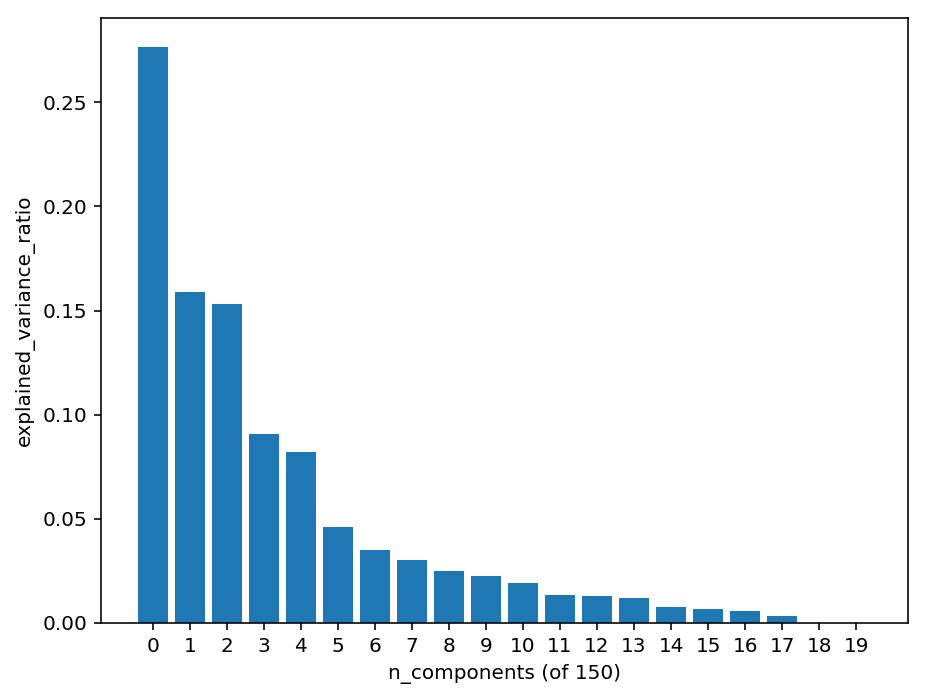

In [8]:
pca = PCA()
X2 = pca.fit_transform(X)

num_features = len(X.columns)
size = 20  # num_features

x = np.arange(size)

plt.figure(figsize=(8,6))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.bar(x=x, height=pca.explained_variance_ratio_[:size])
plt.axis('tight')
plt.xlabel(f'n_components (of {num_features})')
plt.ylabel('explained_variance_ratio')
plt.xticks(x)

plt.show()

In [9]:
# number of componts as estimated by the PCA
pca.n_components_

150

## Model score to accuracy

In [10]:
clf = linear.train_model(X, 0, 0.1)

Train score:  0.9394313967861557


In [11]:
df = pd.DataFrame(columns=['pred', 'score'], index=X.index)

df.pred = clf.predict(X)
df.score = clf.decision_function(X)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11f4f6860>,
      dtype=object)

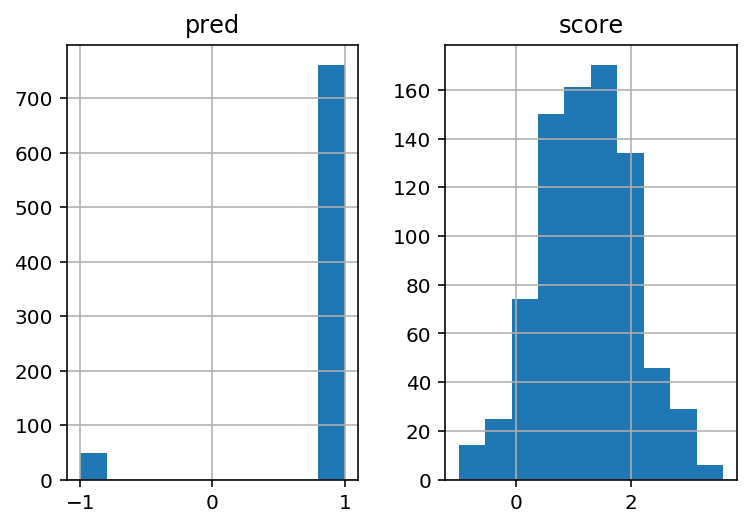

In [12]:
df.hist()

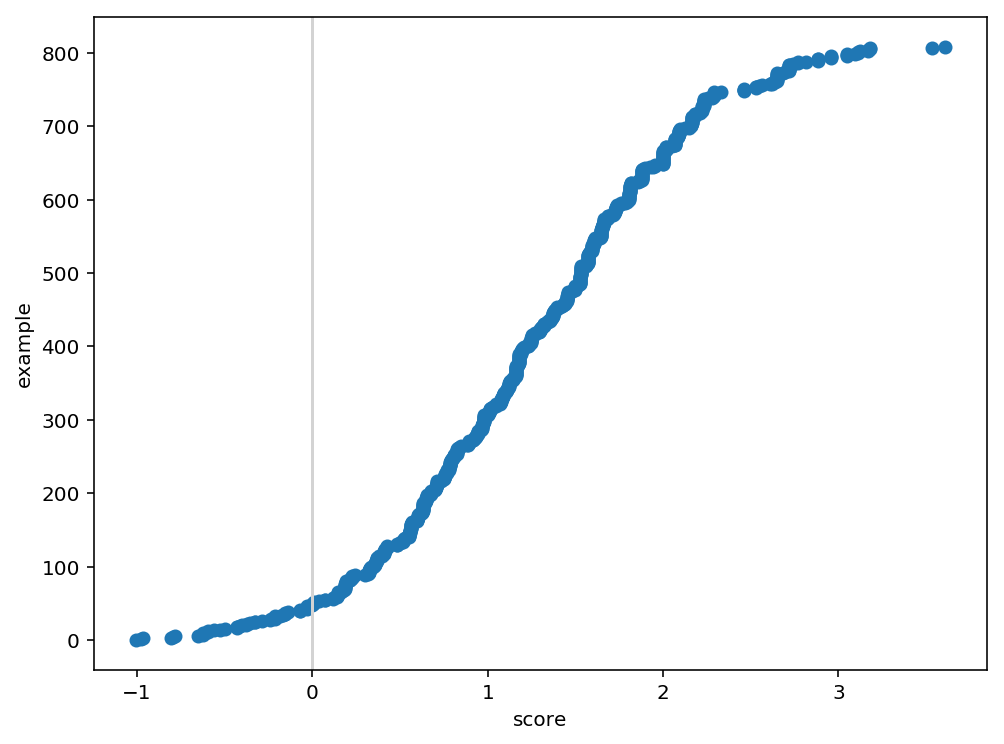

In [13]:
sorted_df = df.sort_values('score')
sorted_df = sorted_df.reset_index();

plt.figure(figsize=(8,6))
plt.scatter(x=sorted_df.score, y=sorted_df.index)
plt.xlabel('score')
plt.ylabel('example')
plt.axvline(0, color='lightgrey')

Text(0,0.5,'prediction')

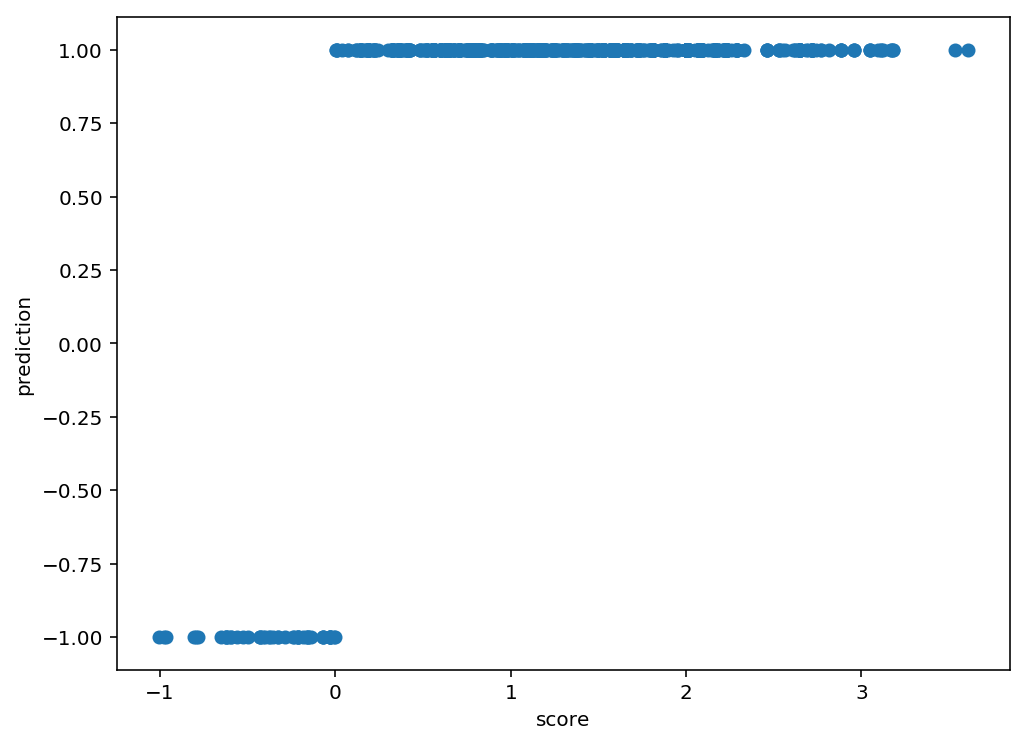

In [14]:
plt.figure(figsize=(8,6))
plt.scatter(x=df.score, y=df.pred)
plt.xlabel('score')
plt.ylabel('prediction')

/usr/local/anaconda3/envs/asp/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Text(0,0.5,'label/loss')

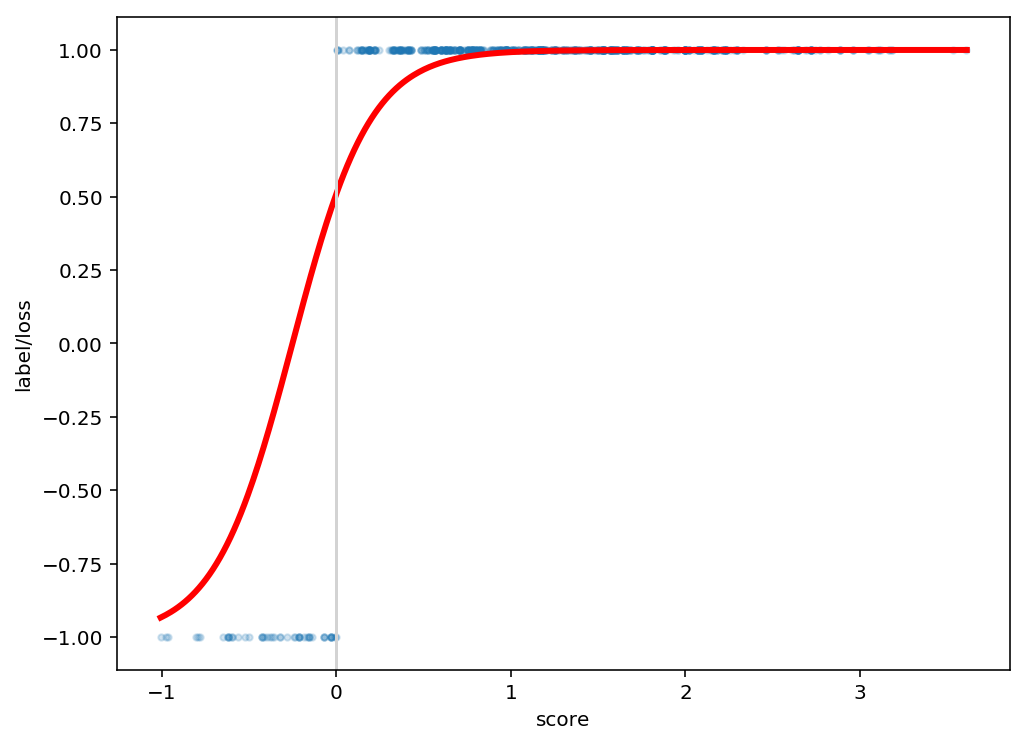

In [15]:
from sklearn.linear_model import LogisticRegression

score = df.pred.values.reshape(len(df.score), 1)
pred = df.pred.values.reshape(len(df.pred), 1)

logreg = LogisticRegression()
logreg.fit(X=score, y=pred)

resolution = 0.01
score_sample = np.arange(df.score.min(), df.score.max()+resolution, resolution)

def model(x):
    return 2 / (1 + np.exp(-x)) - 1
loss = model(score_sample * logreg.coef_ + logreg.intercept_).ravel()

plt.figure(figsize=(8,6))
plt.plot(score_sample, loss, color='red', linewidth=3)
plt.scatter(x=df.score, y=df.pred, alpha=0.2, s=10)
plt.axvline(0, color='lightgrey')
plt.xlabel('score')
plt.ylabel('label/loss')

## Explain the wrong predictions

In [16]:
df['task'] = data.task
df['source'] = data.source

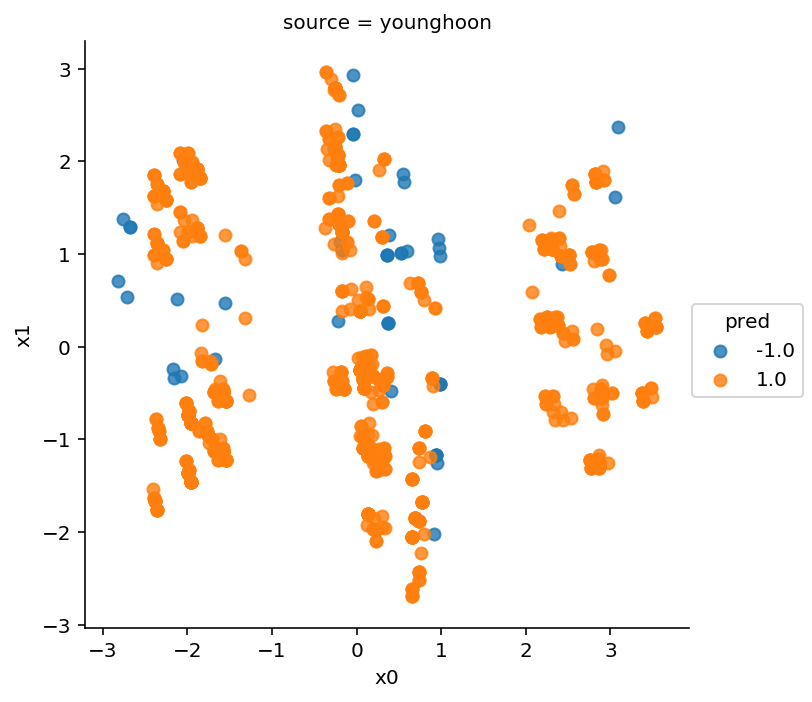

In [17]:
pca = PCA(2)
pca_df = pd.DataFrame(pca.fit_transform(X), index=X.index, columns=['x0', 'x1'])
pca_df = pd.concat([pca_df, df], axis=1)

sns.lmplot(x='x0', y='x1', hue='pred', col='source', data=pca_df, fit_reg=False)

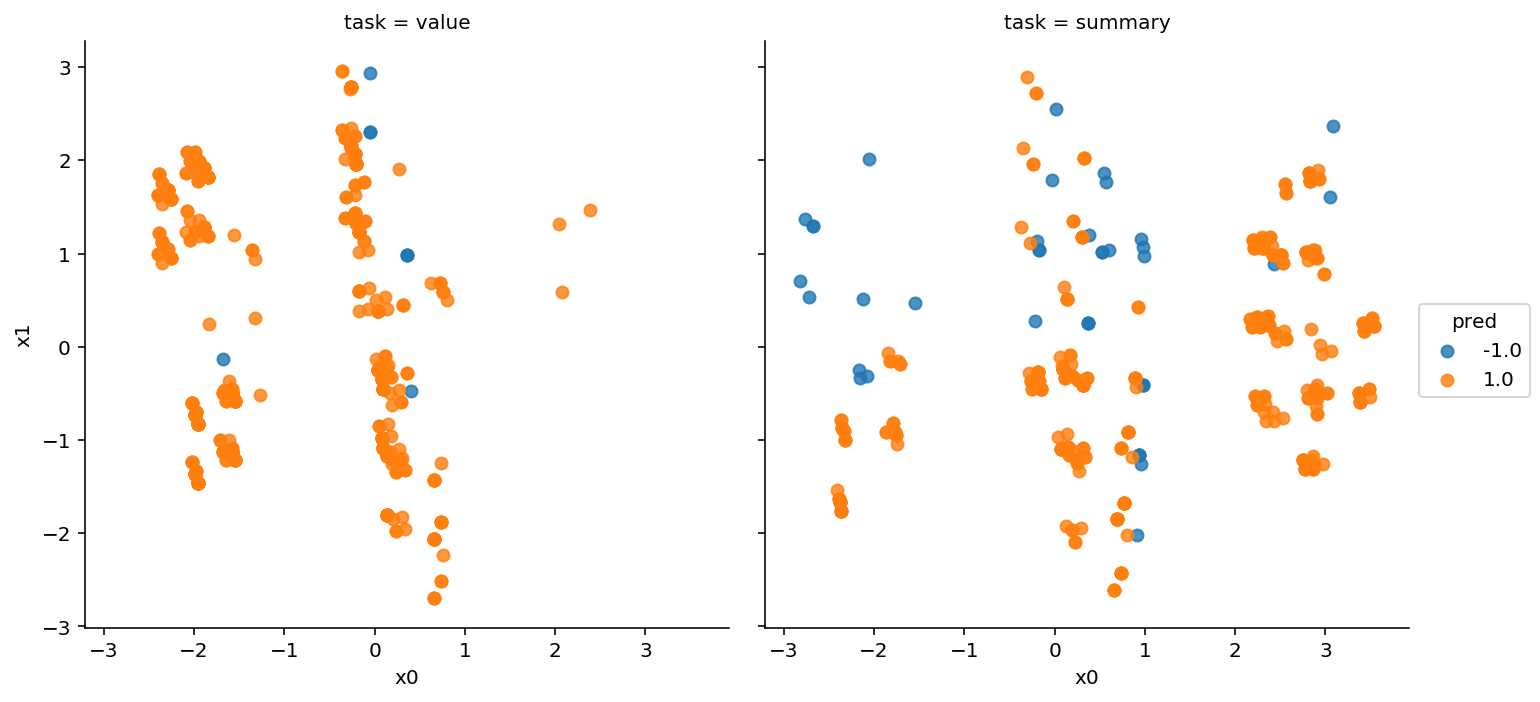

In [18]:
sns.lmplot(x='x0', y='x1', hue='pred', col='task', data=pca_df, fit_reg=False)

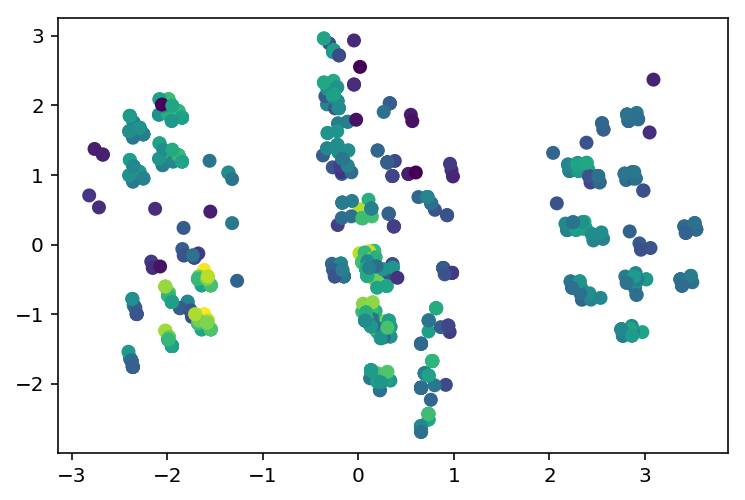

In [19]:
plt.scatter(x=pca_df.x0, y=pca_df.x1, c=pca_df.score, data=pca_df)

In [20]:
# leverage scores

X = X.sort_index()

u, s, vh = np.linalg.svd(X, full_matrices=False)
lev_scores = np.sum(u*u, axis=1)

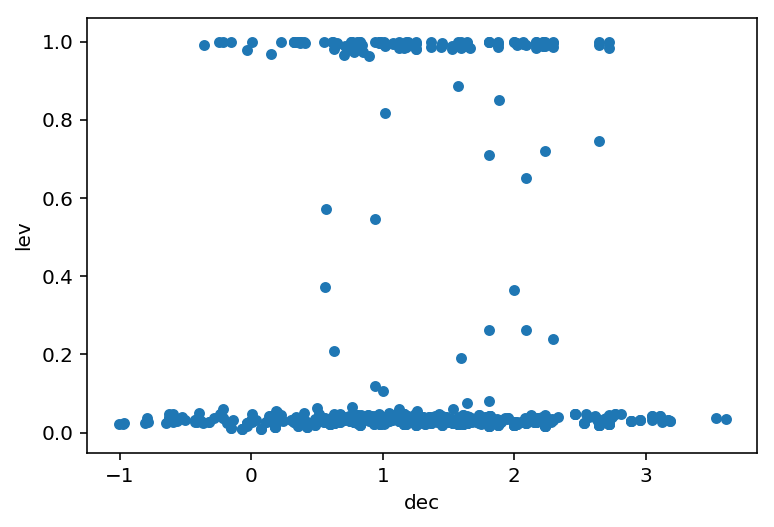

In [21]:
dec_fct = clf.decision_function(X)

scores_dec_fct = pd.DataFrame({'dec': dec_fct, 'lev': lev_scores})
scores_dec_fct = scores_dec_fct.sort_values('dec')

scores_dec_fct.plot.scatter(x='dec', y='lev')

## Plot all feature vectors

In [22]:
list(X.columns)

['agg_dim',
 'aggregate',
 'aggregate_count',
 'aggregate_group_by_raw',
 'aggregate_max',
 'aggregate_mean',
 'aggregate_median',
 'aggregate_min',
 'aggregate_stdev',
 'aggregate_sum',
 'bin',
 'bin_cardinality',
 'bin_high',
 'bin_low',
 'c_c_area',
 'c_c_line',
 'c_c_point',
 'c_c_text',
 'c_c_tick',
 'c_d_area',
 'c_d_bar',
 'c_d_column',
 'c_d_line',
 'c_d_no_overlap_area',
 'c_d_no_overlap_bar',
 'c_d_no_overlap_line',
 'c_d_no_overlap_point',
 'c_d_no_overlap_text',
 'c_d_no_overlap_tick',
 'c_d_point',
 'c_d_text',
 'c_d_tick',
 'color_entropy_high',
 'color_entropy_low',
 'continuous_color',
 'continuous_size',
 'continuous_text',
 'continuous_x',
 'continuous_y',
 'count_twice',
 'd_d_overlap',
 'd_d_point',
 'd_d_rect',
 'd_d_text',
 'encoding',
 'encoding_field',
 'facet_summary',
 'high_cardinality_nominal',
 'high_cardinality_nominal_color',
 'high_cardinality_ordinal',
 'high_cardinality_size',
 'horizontal_scrolling',
 'includes_zero',
 'interesting_color',
 'interesti

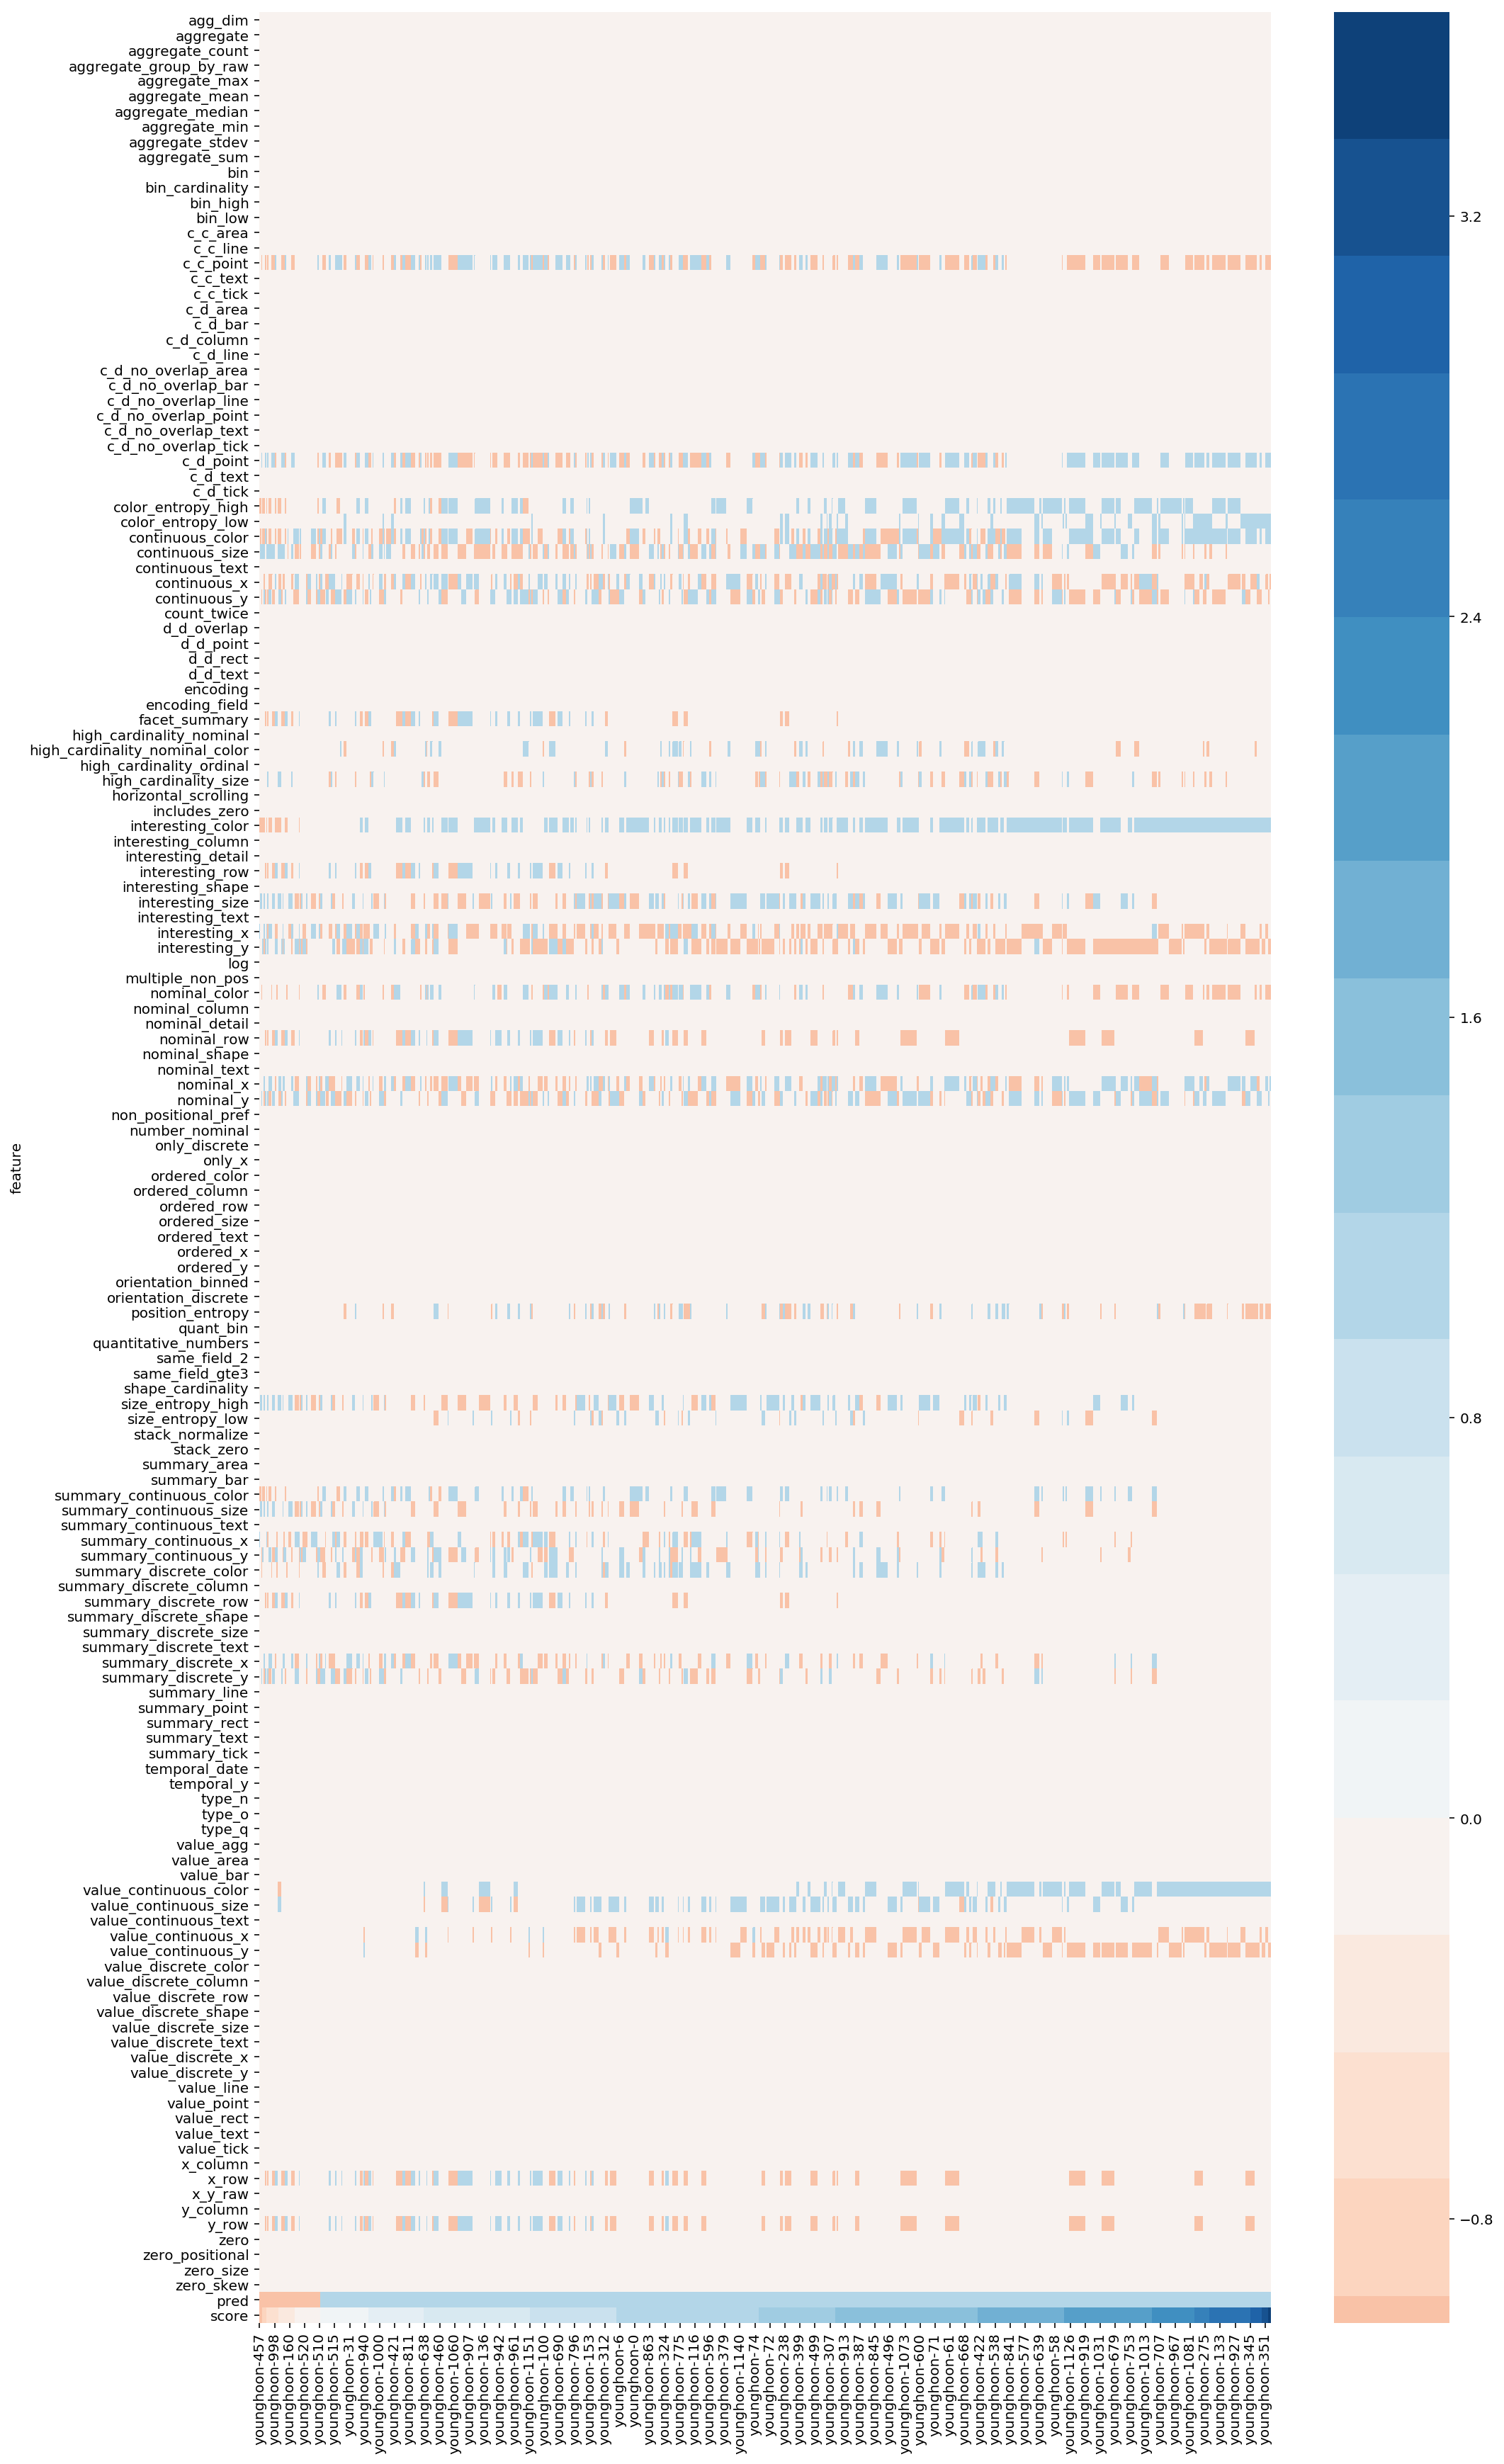

In [23]:
labeled_df = X.copy()
labeled_df['pred'] = clf.predict(X)
labeled_df['score'] = clf.decision_function(X)

labeled_df = labeled_df.sort_values('score')

f, ax = plt.subplots(figsize=(16, 30))

cmap = sns.color_palette("RdBu", 30)

sns.heatmap(labeled_df.T, cmap=cmap, center=0)

This is only a start but we might be able to see certain features that are always negative in the examples that are classified incorrectly. We need to look more at this.  

## Feature ranking

Here we look at the feature weights or some other metrics of importance of features.

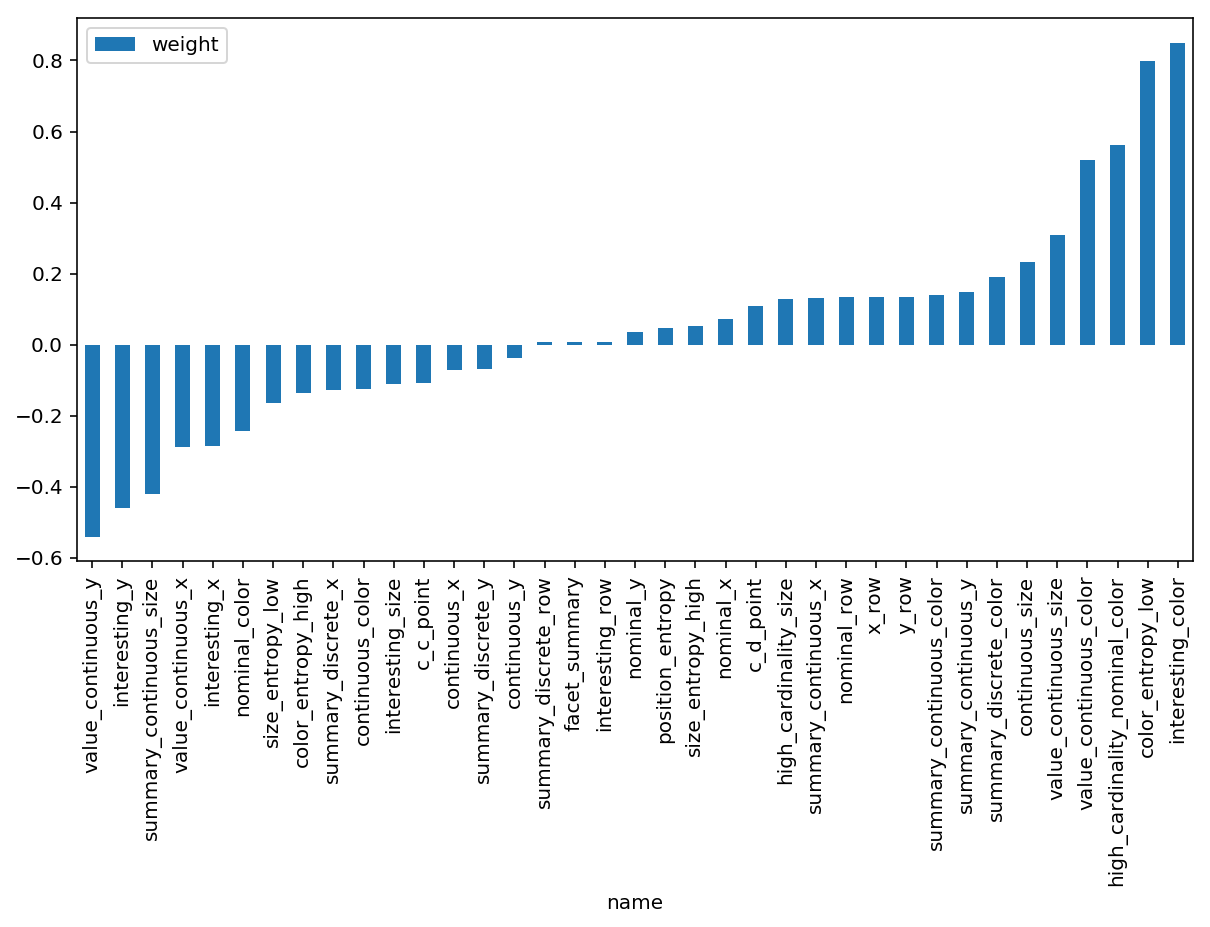

In [24]:
feat_df = pd.DataFrame({'name': X.columns, 'weight': clf.coef_[0]})
interesting_feat_df = feat_df[feat_df.weight != 0].sort_values('weight')
interesting_feat_df.plot.bar(x='name', figsize=(10, 5))